In [79]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
import numpy as np

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
# df = df.drop(columns=['RowNumber','CustomerId','Surname'])
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
counts = df['Exited'].value_counts()

<Axes: xlabel='Exited'>

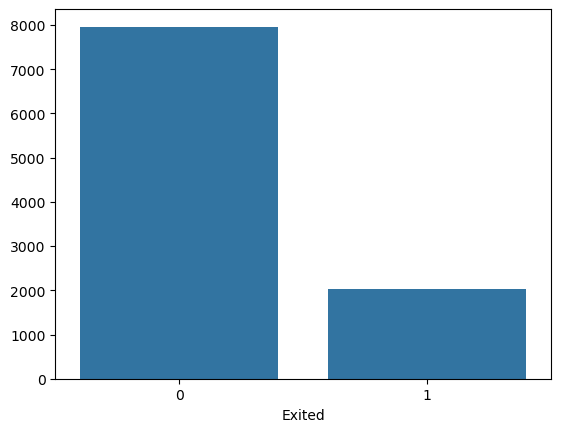

In [15]:
sns.barplot(x=counts.index,y=counts.values )

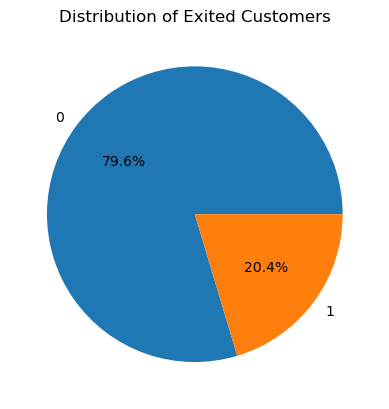

In [18]:
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Exited Customers') # Add a title for clarity
plt.show()

In [46]:
from imblearn.over_sampling import RandomOverSampler 
input_cols = df.drop('Exited',axis=1)
class_cols = df['Exited']
oversample = RandomOverSampler(random_state=0)
input_cols_resampled ,class_cols_resampled = oversample.fit_resample(input_cols,class_cols)

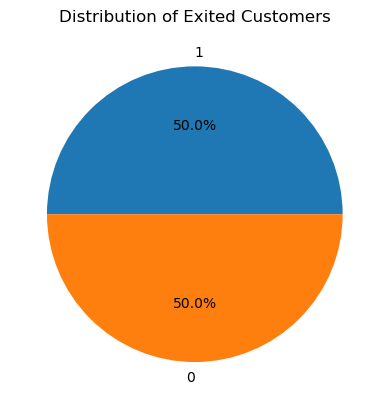

In [47]:
counts = class_cols_resampled.value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Exited Customers') # Add a title for clarity
plt.show()

In [56]:
df_balanced = pd.concat([input_cols_resampled,class_cols_resampled],axis=1)
df_balanced['Exited'].value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [57]:
df_balanced.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
X = df_balanced.iloc[:,:-1]
y = df_balanced.iloc[:,-1]

In [69]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
X.iloc[:,2] = le.fit_transform(X.iloc[:,2].values)

In [70]:
X['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [71]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 

ct  = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')

X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [0.0, 1.0, 0.0, ..., 1, 0, 175070.94],
       [0.0, 0.0, 1.0, ..., 0, 1, 30730.95],
       [1.0, 0.0, 0.0, ..., 1, 1, 182865.09]], dtype=object)

In [72]:
# category_cols = ['Geography']

# # Correct way to apply one-hot encoding to specific columns in X
# # pd.get_dummies will create new columns for 'Geography' categories
# # and automatically drop the original 'Geography' column from X
# X = pd.get_dummies(X, columns=category_cols, drop_first=True, dtype=int)

In [74]:
X[0]

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [75]:
from sklearn.model_selection import  train_test_split 

x_train,x_test , y_train,y_test = train_test_split(X,y.values , train_size=.8 ,random_state=0)


In [76]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [81]:
x_train[0].shape

(12,)

In [80]:
np.random.seed(42)
tf.random.set_seed(42)

In [84]:
from keras.models import Sequential
from keras.layers import Dense 

model= Sequential()
model.add(Dense(input_shape=x_train[0].shape,units=6,activation='relu'))
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics= ['accuracy'])

model.summary()


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127 (508.00 B)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 0 (0.00 B)

In [89]:
model.fit(x_train,y_train,epochs=20 )

Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7883 - loss: 0.4410
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7915 - loss: 0.4399
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7908 - loss: 0.4399
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7907 - loss: 0.4399
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7905 - loss: 0.4400
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7901 - loss: 0.4401
Epoch 7/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7906 - loss: 0.4402
Epoch 8/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7899 - loss: 0.4402
Epoch 9/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7904 - loss: 0.4402
Epoch 10/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7910 - loss: 0.4403
Epoch 11/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7911 - loss: 0.4402
Epoch 12/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [90]:
model.evaluate(x_test,y_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7802 - loss: 0.4591


[0.4628821611404419, 0.7831135988235474]

In [101]:
y_pred = model.predict(x_test)
y_pred[:5]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.4171703 ],
       [0.5055859 ],
       [0.962522  ],
       [0.98929197],
       [0.99979544]], dtype=float32)

In [102]:
y_pred = (y_pred > 0.5).astype(int)

In [103]:

y_pred[:5]

array([[0],
       [1],
       [1],
       [1],
       [1]])

In [105]:
from sklearn.metrics import classification_report ,confusion_matrix 
print("Classification Report:\n ",classification_report(y_test,y_pred) )

Classification Report:
                precision    recall  f1-score   support

           0       0.78      0.78      0.78      1590
           1       0.78      0.79      0.78      1596

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



In [107]:
model= Sequential()
model.add(Dense(input_shape=x_train[0].shape,units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics= ['accuracy'])
model.fit(x_train,y_train,epochs=25 ,batch_size=5 )

Epoch 1/25


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2548/2548 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7171 - loss: 0.5487
Epoch 2/25
2548/2548 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7808 - loss: 0.4524
Epoch 3/25
2548/2548 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7883 - loss: 0.4374
Epoch 4/25
2548/2548 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7967 - loss: 0.4221
Epoch 5/25
2548/2548 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8073 - loss: 0.4082
Epoch 6/25
2548/2548 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8115 - loss: 0.3939
Epoch 7/25
2548/2548 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8200 - loss: 0.3779
Epoch 8/25
2548/2548 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8279 - loss: 0.3664
Epoch 9/25
2548/2548 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8346 - loss: 0.3508
Epoch 10/25
2548/2548 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8460 - loss: 0.3367
Epoch 11/25
2548/2548 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8522 - loss: 0.3228
Epoch 12/25
2548/2548 ━━━━━━━━━━━━━━━━━━━

In [109]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
print("Classification Report:\n ",classification_report(y_test,y_pred) )

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
                precision    recall  f1-score   support

           0       0.93      0.74      0.83      1590
           1       0.79      0.95      0.86      1596

    accuracy                           0.85      3186
   macro avg       0.86      0.85      0.84      3186
weighted avg       0.86      0.85      0.84      3186



In [111]:
model.save('churn_model.keras')

In [112]:
from joblib import dump 

dump(le,"churn_gender_label_encoder.pkl")
dump(scaler,"churn_stacnder_sacler.pkl")
dump(ct,"churn_geograhicail_transfoemer.pkl")

['churn_geograhicail_transfoemer.pkl']

In [129]:
new_coustomer = np.array([[660,'France','Male',40,3,60000,2,	1,	1,50000]])

In [130]:
from joblib import load 
le_loaded = load("churn_gender_label_encoder.pkl")
new_coustomer[:,2] = le_loaded.transform(new_coustomer[:,2])

In [131]:
ct_load = load("churn_geograhicail_transfoemer.pkl")
new_coustomer = ct_load.transform(new_coustomer)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [132]:
new_coustomer

array([['1.0', '0.0', '0.0', '660', '1', '40', '3', '60000', '2', '1',
        '1', '50000']], dtype='<U32')

In [133]:
scaler_load = load("churn_stacnder_sacler.pkl")
new_coustomer = scaler_load.transform(new_coustomer)

In [134]:
y_pred1 = model.predict(new_coustomer)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [135]:
y_pred1

array([[0.00463137]], dtype=float32)

In [137]:
(y_pred1 > 0.5).astype(int)

array([[0]])